In [447]:
# Predicting Hospital Patient Length of Stay

In [448]:
### Since the beginning of the COVID-19 pandemic, hospitals have consistently struggled with patient bed, resource, and staffing shortages, and being able to forecast patient stay length will help hospitals to predict bed/room availability, age-appropriate care, staffing, and resource needs, as well as ensure financial security.

In [449]:
## Issues

In [450]:
### Issue: Ongoing financial instability is a problem across America's hospital as they recover from the height of the COVID-19 pandemic.

In [451]:
### Solution: Hospitals will be better able to predict revenue to ensure financial security through patient Length of Stay prediction.

In [452]:
### Issue: Age is a determinant of educational and counseling strategies as well as recovery outcome, and hospitals cannot prepare for this without a forecast of age care needs. 

In [453]:
### Solution: Hospitals will be better able to forecast needs for age appropriate care through patient Length of Stay prediction.

In [454]:
### Issue: The nurse shortage in America is only increasing, and miscommunication in staffing needs is a contributor.

In [455]:
### Solution: Hospitals will be better able to forecast staffing needs through patient Length of Stay prediction.

In [456]:
### Issue: The COVID-19 pandemic shined a light on how the healthcare system struggles when faced with a lack of patient beds and resources. 

In [457]:
### Solution: Hospitals will be better able to forecast bed/resource needs through patient Length of Stay prediction.

In [458]:
## Importing extensions

In [459]:
import numpy as np

In [460]:
import pandas as pd

In [461]:
import matplotlib.pyplot as plt

In [462]:
import seaborn as sns

In [463]:
import statsmodels.api as sm
sns.set_style("darkgrid")

In [464]:
## Uploading tables 

In [465]:
# <span style="color:blue">Descriptive Statistics</span>

In [466]:
## Train table

In [467]:
train = pd.read_csv("train_data.csv")
#train.info()
#train.describe()

In [468]:
train.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [469]:
#print(train.isnull().sum())

In [470]:
### Dropping columns with null values 

In [471]:
print(train.shape)

(318438, 18)


In [472]:
train.drop("Bed Grade", axis= "columns", inplace=True)

In [473]:
print(train.shape)

(318438, 17)


In [474]:
train.drop("City_Code_Patient", axis= "columns", inplace=True)

In [475]:
print(train.shape)

(318438, 16)


In [476]:
### Identifying data types of each column to check compatibility

In [477]:
train.dtypes

case_id                                int64
Hospital_code                          int64
Hospital_type_code                    object
City_Code_Hospital                     int64
Hospital_region_code                  object
Available Extra Rooms in Hospital      int64
Department                            object
Ward_Type                             object
Ward_Facility_Code                    object
patientid                              int64
Type of Admission                     object
Severity of Illness                   object
Visitors with Patient                  int64
Age                                   object
Admission_Deposit                    float64
Stay                                  object
dtype: object

In [478]:
## Looking at Stay Length

In [479]:
### Counting the unique values in 'Stay'

Stay_count = train['Stay'].value_counts(sort= True)
Stay_count

21-30                 87491
11-20                 78139
31-40                 55159
51-60                 35018
0-10                  23604
41-50                 11743
71-80                 10254
More than 100 Days     6683
81-90                  4838
91-100                 2765
61-70                  2744
Name: Stay, dtype: int64

In [480]:
### Expressing the counts as proportions
print(train.Stay.value_counts(normalize= True))

21-30                 0.274751
11-20                 0.245382
31-40                 0.173217
51-60                 0.109968
0-10                  0.074124
41-50                 0.036877
71-80                 0.032201
More than 100 Days    0.020987
81-90                 0.015193
91-100                0.008683
61-70                 0.008617
Name: Stay, dtype: float64


Text(0.5, 1.0, 'Stay Length of Patients (Days)')

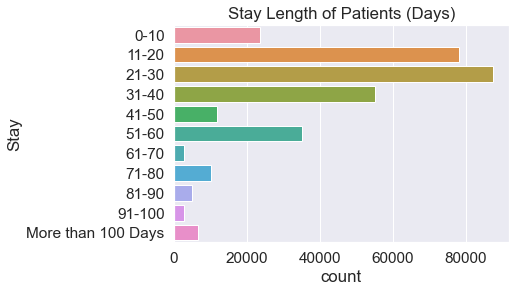

In [481]:
### Visualizing counts
sns.set_style("darkgrid")

category_order = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100', 'More than 100 Days']

sns.countplot(y= "Stay", data= train, order= category_order)

plt.title('Stay Length of Patients (Days)')

In [482]:
## INSIGHTS:
⮞ Stay Lengths of 11-20 and 21-30 Days are most common, while Stay Lengths suddenly increase at 51-60 Days
⮞ 11-20 Days: 78,139 patients, an increase of 🡹 54,525 compared to 0-10 Days
⮞ 21-30 Days: 87,491 patients, an increase of 🡹 9,352 compared to 11-20 Days
⮞ 51-60 Days: 35,018 patients, an increase of 🡹 23,275 compared to 41-50 Days, and 🡹 32,274 compared to 61-70 Days

SyntaxError: invalid character '⮞' (U+2B9E) (1426815092.py, line 2)

In [483]:
## Looking at Ages by Stay Length

In [484]:
### Counting the unique values in 'Age'

Stay_count = train['Stay'].value_counts(sort= True)
Stay_count

21-30                 87491
11-20                 78139
31-40                 55159
51-60                 35018
0-10                  23604
41-50                 11743
71-80                 10254
More than 100 Days     6683
81-90                  4838
91-100                 2765
61-70                  2744
Name: Stay, dtype: int64

In [485]:
### Expressing the counts as proportions
print(train.Stay.value_counts(normalize= True))

21-30                 0.274751
11-20                 0.245382
31-40                 0.173217
51-60                 0.109968
0-10                  0.074124
41-50                 0.036877
71-80                 0.032201
More than 100 Days    0.020987
81-90                 0.015193
91-100                0.008683
61-70                 0.008617
Name: Stay, dtype: float64


In [486]:
### Age distribution for each stay length
stay_age_distribution = pd.get_dummies(train.loc[:,['Stay','Age']], columns=['Age']).groupby('Stay', as_index=False).sum()
stay_age_distribution

,Stay,Age_0-10,Age_11-20,Age_21-30,Age_31-40,Age_41-50,Age_51-60,Age_61-70,Age_71-80,Age_81-90,Age_91-100
0,0-10,615.0,1552.0,3467.0,4916.0,4727.0,3427.0,2194.0,2201.0,422.0,83.0
1,11-20,1959.0,5343.0,11272.0,15792.0,14959.0,11346.0,7870.0,7958.0,1392.0,248.0
2,21-30,1489.0,4312.0,11394.0,18550.0,17906.0,13058.0,9033.0,9534.0,1920.0,295.0
3,31-40,1014.0,2681.0,6912.0,10912.0,10983.0,8569.0,5930.0,6420.0,1504.0,234.0
4,41-50,187.0,510.0,1398.0,2373.0,2507.0,1735.0,1205.0,1383.0,379.0,66.0
5,51-60,582.0,1429.0,3793.0,6517.0,7189.0,5739.0,4081.0,4433.0,1082.0,173.0
6,61-70,26.0,89.0,263.0,509.0,562.0,448.0,325.0,378.0,115.0,29.0
7,71-80,153.0,350.0,1026.0,1807.0,2146.0,1710.0,1230.0,1367.0,402.0,63.0
8,81-90,84.0,223.0,546.0,801.0,885.0,784.0,600.0,670.0,216.0,29.0
9,91-100,35.0,71.0,231.0,484.0,578.0,499.0,330.0,386.0,132.0,19.0


['Age_0-10', 'Age_11-20', 'Age_21-30', 'Age_31-40', 'Age_41-50', 'Age_51-60', 'Age_61-70', 'Age_71-80', 'Age_81-90', 'Age_91-100']


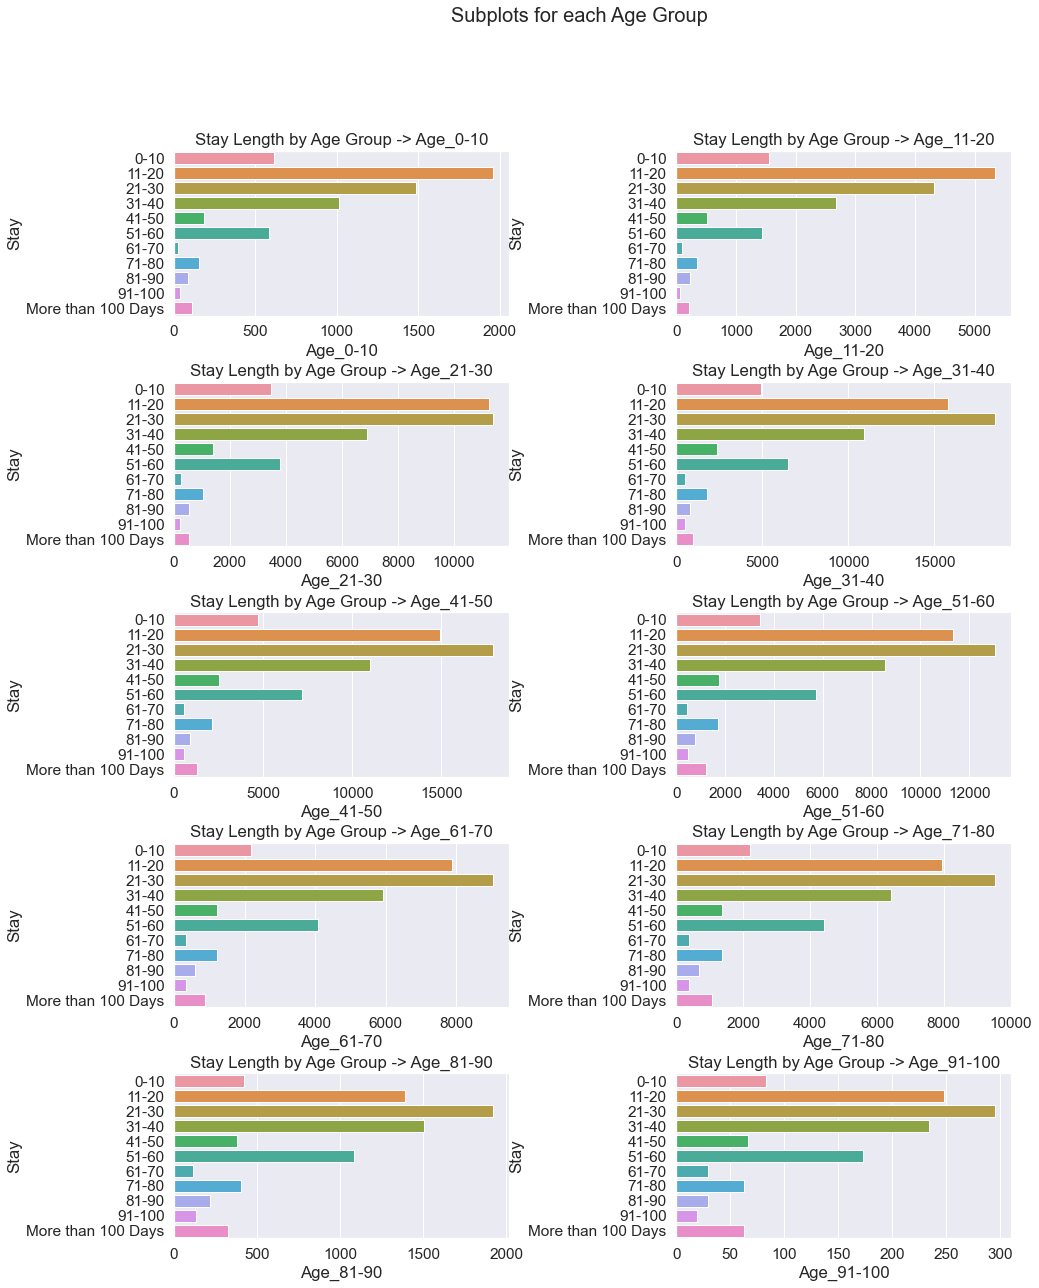

In [487]:
### Creating a For loop to create subplots for all age groups
Ages = stay_age_distribution.columns.tolist()
Ages.remove('Stay')
print(Ages)

plt.figure(figsize=(15,20))
plt.suptitle("Subplots for each Age Group", fontsize=20)
x = 1
for age in Ages:
    ax = plt.subplot(int(len(Ages)//2),2,x)
    ax = plt.subplots_adjust(wspace=0.5,hspace=0.4)
    sns.barplot(y = 'Stay', x = age, data = stay_age_distribution, ax = ax)
    plt.title(f'Stay Length by Age Group -> {age}')
    x +=1

In [488]:
## INSIGHTS
⮞ Majority of Admissions: Age Groups 31-40 (40,859), 41-50 (40,054), 51-60 (30,143)
⮞ 11-20 Days: Age Groups 11-20 🡹, 51-60 🡹, and 61-70 🡹 from previous groups
⮞ 21-30 Days: Age Groups 0-10 🡻, 11-20 🡻, and 81-90 🡹 from previous groups
⮞ 51-60 Days: Age Groups 41-50 🡹, 51-60 🡹, and 61-70 🡹 from previous groups
⮞ All Age Groups increase at Stay Length of 51-60 Days, which reflects the increase when looking at overall Stay Lengths, with Age Group 81-90 the most responsible 

SyntaxError: invalid character '⮞' (U+2B9E) (2198044381.py, line 2)

In [ ]:
## Looking at Departments by Stay Length

In [489]:
### Counting the unique values in 'Department'
Dept_count = train['Department'].value_counts(sort= True)
Dept_count

gynecology            249486
anesthesia             29649
radiotherapy           28516
TB & Chest disease      9586
surgery                 1201
Name: Department, dtype: int64

In [490]:
### Expressing the counts as proportions
Dept_count = train['Department'].value_counts(normalize= True)
Dept_count

gynecology            0.783468
anesthesia            0.093108
radiotherapy          0.089550
TB & Chest disease    0.030103
surgery               0.003772
Name: Department, dtype: float64

In [491]:
### Department distribution for each stay length
stay_dept_distribution = pd.get_dummies(train.loc[:,['Stay','Department']], columns=['Department']).groupby('Stay', as_index=False).sum()
stay_dept_distribution

,Stay,Department_TB & Chest disease,Department_anesthesia,Department_gynecology,Department_radiotherapy,Department_surgery
0,0-10,791.0,1519.0,18849.0,2379.0,66.0
1,11-20,2379.0,8823.0,59690.0,6988.0,259.0
2,21-30,2618.0,8950.0,68383.0,7263.0,277.0
3,31-40,1753.0,4958.0,43535.0,4713.0,200.0
4,41-50,300.0,851.0,9671.0,879.0,42.0
5,51-60,1047.0,2527.0,27989.0,3256.0,199.0
6,61-70,76.0,173.0,2226.0,264.0,5.0
7,71-80,294.0,703.0,8165.0,1043.0,49.0
8,81-90,140.0,384.0,3748.0,528.0,38.0
9,91-100,64.0,156.0,2269.0,256.0,20.0


<Figure size 432x288 with 0 Axes>

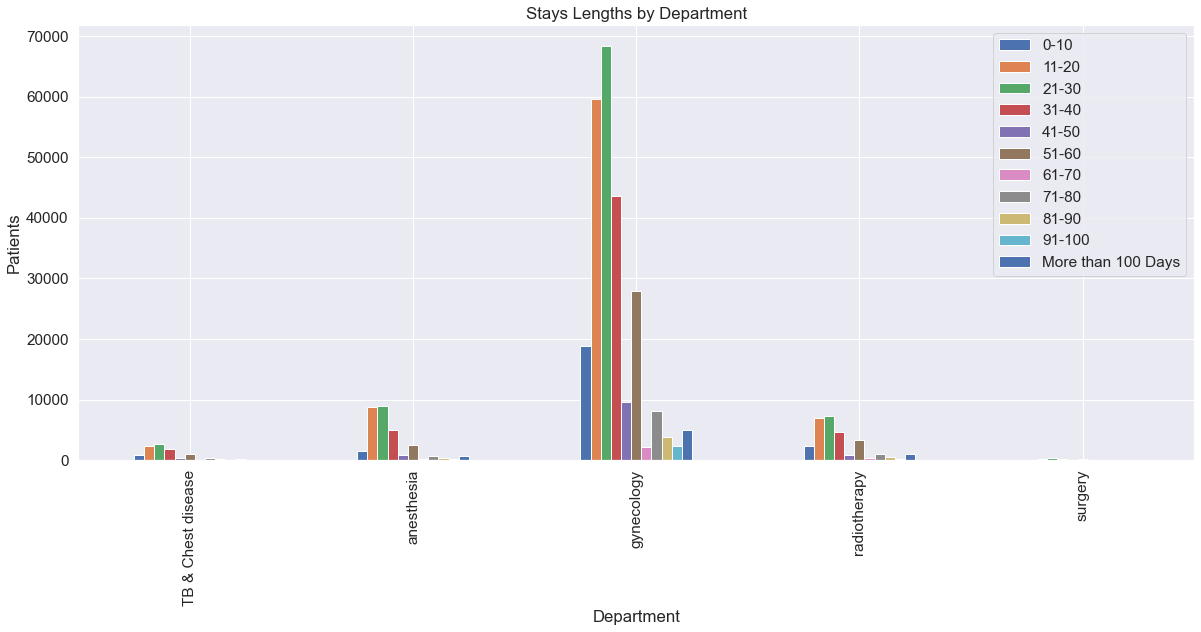

In [492]:
### Visualizing the Departments by Stay Lengths

Stay_index = train.Stay.value_counts().index[:11]
Stay_index

Department_codeindex= train.Department.value_counts().index[:6]
Department_codeindex

subdata = train[(train.Department.isin(Department_codeindex)) & (train.Stay.isin(Stay_index))]

cf = pd.crosstab(columns=subdata.Stay, index = subdata.Department) 
cf

plt.figure()
Dept_Stay = pd.crosstab(columns=subdata.Stay, index = subdata.Department) 
cf.plot.bar(figsize = (20,8), )
plt.legend(loc = 'best')
plt. savefig('100dpi3.png', dpi=100)
plt.title("Stays Lengths by Department")
plt.ylabel('Patients')
plt.show()

In [493]:
## INSIGHTS:
⮞ Gynecology has the most admitted patients (249,486), followed by anesthesia (29,649), radiotherapy (28,516),
TB & Chest disease (9,586), surgery (1,201)
⮞ The most common Stay Length among all Departments is 21-30 Days, followed by 11-20 Days
⮞ Surgery has the largest ratio of patients who stay more than 100 Days

SyntaxError: invalid character '⮞' (U+2B9E) (3569962285.py, line 2)

In [ ]:
## Severity of Illness by Stay Length

In [494]:
### Counting unique values in "Severity of Illness"
SIL_count = train['Severity of Illness'].value_counts(sort= True)
SIL_count

Moderate    175843
Minor        85872
Extreme      56723
Name: Severity of Illness, dtype: int64

In [495]:
### Expressing the counts as proportions
print(train['Severity of Illness'].value_counts(normalize= True))

Moderate    0.552205
Minor       0.269666
Extreme     0.178129
Name: Severity of Illness, dtype: float64


In [496]:
### Severity of Illness distribution for each stay length
stay_SIL_distribution = pd.get_dummies(train.loc[:,['Stay','Severity of Illness']], columns= ['Severity of Illness']).groupby('Stay', as_index=False).sum()
stay_SIL_distribution

,Stay,Severity of Illness_Extreme,Severity of Illness_Minor,Severity of Illness_Moderate
0,0-10,3399.0,7866.0,12339.0
1,11-20,10518.0,27081.0,40540.0
2,21-30,15502.0,21535.0,50454.0
3,31-40,10086.0,14447.0,30626.0
4,41-50,2351.0,3000.0,6392.0
5,51-60,7777.0,7128.0,20113.0
6,61-70,647.0,519.0,1578.0
7,71-80,2575.0,1928.0,5751.0
8,81-90,1113.0,985.0,2740.0
9,91-100,805.0,425.0,1535.0


<Figure size 432x288 with 0 Axes>

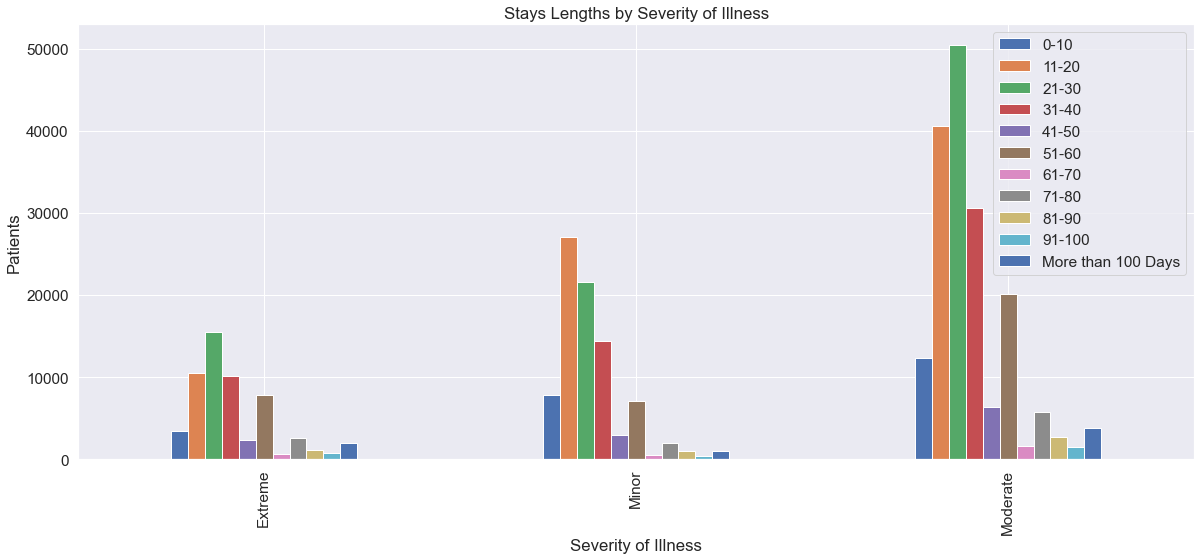

In [497]:
### Visualizing Stay Length for each Severity of Illness
Stay_index = train.Stay.value_counts().index[:11]
Stay_index

SIL_index= train['Severity of Illness'].value_counts().index[:7]
SIL_index

subdata = train[(train['Severity of Illness'].isin(SIL_index)) & (train.Stay.isin(Stay_index))]

cf = pd.crosstab(columns=subdata.Stay, index = subdata['Severity of Illness']) 
cf

plt.figure()
SIL_Stay = pd.crosstab(columns=subdata.Stay, index = subdata['Severity of Illness']) 
cf.plot.bar(figsize = (20,8), )
plt.legend(loc = 'best')
plt. savefig('100dpi3.png', dpi=100)
plt.title("Stays Lengths by Severity of Illness")
plt.ylabel('Patients')
plt.show()

In [498]:
### INSIGHTS:
⮞The majority of patients are identified as Moderately ill (175,843 patients), followed by Minorly ill (85,872 patients), and finally Extreme illness (56,723 patients)
⮞ There does not seem to be a pattern to Stay Length in the patients identified as Moderately ill
⮞ Patients identified as Minorly ill seem to stay for a shorter amount of time, with a larger amount staying 0-10 Days, and smaller amount staying More than 100 Days
⮞  Patients identified as Extremely ill seem to stay for a longer amount of time, with a smaller amount staying 0-10 Days, and a larger amount staying More than 100 Days

SyntaxError: invalid character '⮞' (U+2B9E) (1305070069.py, line 2)

In [499]:
## Type of Admission by Stay Length

In [500]:
### Counting unique values in "Type of Admission"
TOA_count = train['Type of Admission'].value_counts(sort= True)
TOA_count

Trauma       152261
Emergency    117676
Urgent        48501
Name: Type of Admission, dtype: int64

In [501]:
### Expressing the counts as proportions
print(train['Type of Admission'].value_counts(normalize= True))

Trauma       0.478150
Emergency    0.369541
Urgent       0.152309
Name: Type of Admission, dtype: float64


In [502]:
# TOA distribution for each stay length
stay_TOA_distribution = pd.get_dummies(train.loc[:,['Stay','Type of Admission']], columns=['Type of Admission']).groupby('Stay', as_index=False).sum()
stay_TOA_distribution

,Stay,Type of Admission_Emergency,Type of Admission_Trauma,Type of Admission_Urgent
0,0-10,14218.0,5328.0,4058.0
1,11-20,31559.0,33745.0,12835.0
2,21-30,27399.0,46244.0,13848.0
3,31-40,18921.0,28107.0,8131.0
4,41-50,4145.0,5968.0,1630.0
5,51-60,11885.0,18310.0,4823.0
6,61-70,976.0,1479.0,289.0
7,71-80,3375.0,5551.0,1328.0
8,81-90,1708.0,2548.0,582.0
9,91-100,935.0,1518.0,312.0


<Figure size 432x288 with 0 Axes>

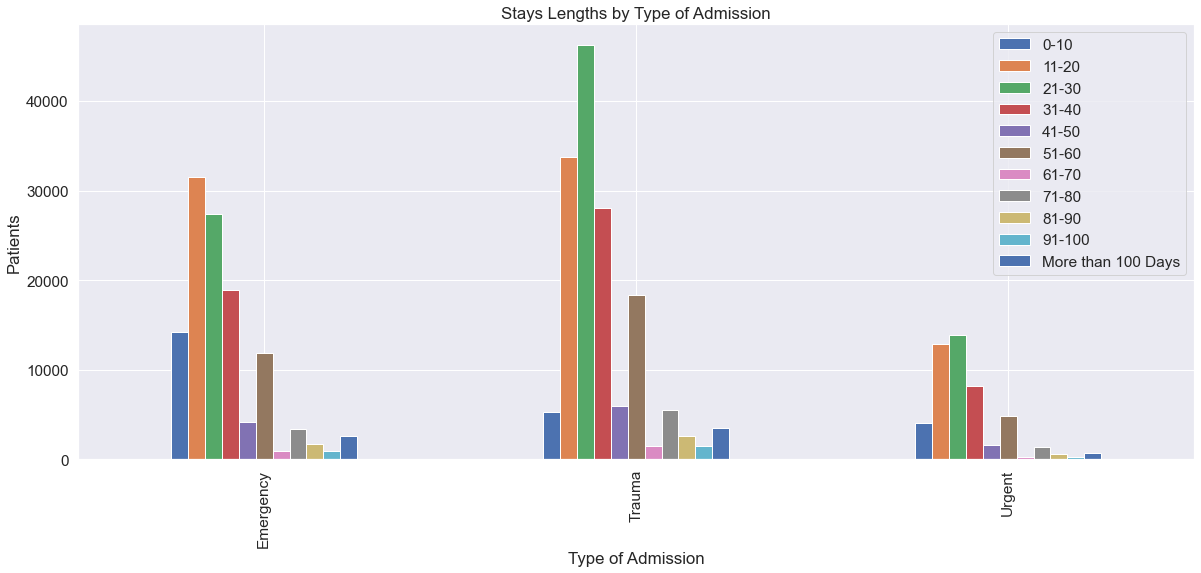

In [503]:
### Visualizing Stay Length for each Type of Admission

Stay_index = train.Stay.value_counts().index[:11]
Stay_index

TOA_index= train['Type of Admission'].value_counts().index[:4]
TOA_index

subdata = train[(train['Type of Admission'].isin(TOA_index)) & (train.Stay.isin(Stay_index))]

cf = pd.crosstab(columns=subdata.Stay, index = subdata['Type of Admission']) 
cf

plt.figure()
TOA_Stay = pd.crosstab(columns=subdata.Stay, index = subdata['Type of Admission']) 
cf.plot.bar(figsize = (20,8), )
plt.legend(loc = 'best')
plt. savefig('100dpi3.png', dpi=100)
plt.title("Stays Lengths by Type of Admission")
plt.ylabel('Patients')
plt.show()

In [504]:
### INSIGHTS:
⮞The leading Type of Admission is Trauma (152261,~47.81%), followed by Emergency (117676, ~36.95%), and lastly Urgent (48501, ~15.23%)
⮞ 58958, or ~66% of Emergency, 79989, or ~71% of Trauma, and 26683, or ~72% of Urgent Admissions stay between 11-20 to 21-30 days
⮞ Emergency Admissions are more likely to stay between 0-10 days to 11-20 days than any other group

SyntaxError: invalid character '⮞' (U+2B9E) (1861582883.py, line 2)

In [505]:
## Admission Deposit by Stay Length

In [506]:
### Identifying the average overall Admission Deposit
AD_Avg = train['Admission_Deposit'].mean()
AD_Avg

4880.749392346391

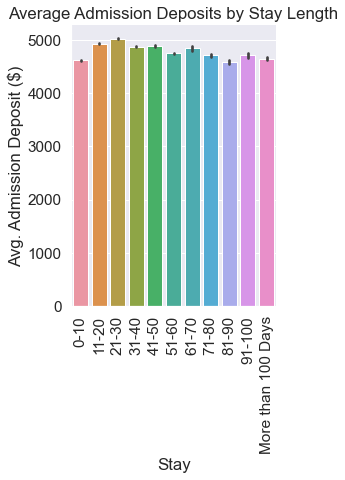

In [507]:
### Vizualizing Average Admission Deposit for each stay length
category_order = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100', 'More than 100 Days']

sns.set_style("darkgrid")
plot = sns.catplot(x= "Stay", y= "Admission_Deposit", data= train, kind= "bar", order= category_order)
rotation = 90
for axis in plot.fig.axes:  
     axis.set_xticklabels(axis.get_xticklabels(), rotation = rotation)
plt.title("Average Admission Deposits by Stay Length")
plt.ylabel('Avg. Admission Deposit ($)')
plt.show()

In [508]:
### INSIGHTS

⮞ There is not much variance in the Admission Deposits (AD) across all Stay Lengths
⮞ The average overall AD was $4880.75
⮞ Stay Lengths of 21-30 days had the highest average AD of ~$5000
⮞ Stay Lengths of 81-90 days had the lowest average AD of ~$4500
⮞ Stay Lengths of 61-70 days had the largest range of data
⮞ After 0-10 days ADs increase overall, and after 41-50 days ADs decrease overall

SyntaxError: invalid character '⮞' (U+2B9E) (838575318.py, line 3)

In [ ]:
# <span style="color:blue">Inferential Statistics</span>

In [ ]:
## Regression Analysis

In [ ]:
### Importing Train data that has been converted into Nominal and Ordinal Variables for statistical analysis
stats = pd.read_csv("train_data2.csv")

In [ ]:
stats.head()

In [ ]:
### Dropping irrelevant columns

In [ ]:
stats.drop("Regression formula", axis= "columns", inplace=True)

In [ ]:
stats.drop("Unnamed: 6", axis= "columns", inplace=True)

In [ ]:
stats.drop("Unnamed: 7", axis= "columns", inplace=True)

In [ ]:
stats.head()

Text(0.5, 1.0, 'Correlation Heatmap')

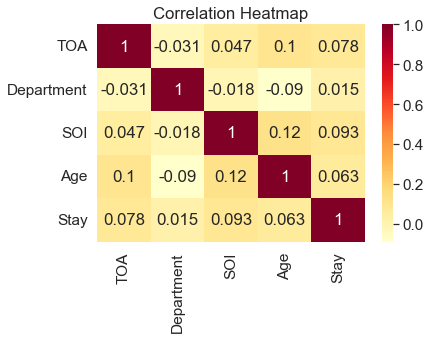

In [509]:
### Correlation Heatmap to identify variable correlation

columns = ['TOA', 'Department', 'SOI','Age', 'Stay']
corr_df = stats[columns].corr()
df_heatmap = sns.heatmap(corr_df, cmap='YlOrRd', annot=True)
plt.title('Correlation Heatmap')

In [510]:
## INSIGHT
⮞ SOI (Severity of Illness) (.09) and TOA (Type of Admission) (0.08) seem to have a slight correlation with Stay Length.

SyntaxError: invalid character '⮞' (U+2B9E) (182629942.py, line 2)

Text(0.5, 1.0, 'Variable Correlation with Stay Length')

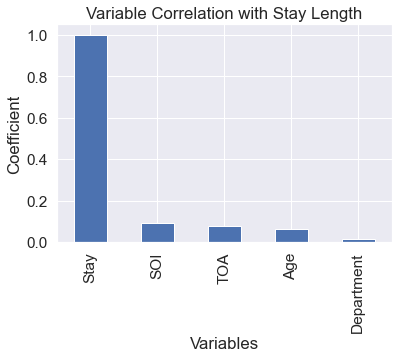

In [511]:
### Visualizing Variable Correlation with Coefficient plot

col_list_corr = corr_df.columns
corr_df=corr_df.sort_values('Stay', ascending=False)
corr_df['Stay'].plot(kind='bar')
plt.xlabel('Variables')
plt.ylabel('Coefficient')
plt.title('Variable Correlation with Stay Length')

In [512]:
## INSIGHT
⮞ This confirms that SOI (Severity of Illness) (.09) and TOA (Type of Admission) (.08) seem to have a slight correlation with Stay Length.

SyntaxError: invalid character '⮞' (U+2B9E) (616607719.py, line 2)

In [513]:
### OLS Regression Model

columns_1 = ['TOA', 'Department', 'SOI','Age']
columns_2 = ['Stay']

independent_variables = stats[columns_1]
dependent_variables = stats[columns_2]

independent_variables = sm.add_constant(independent_variables)

regression_model = sm.OLS(dependent_variables,independent_variables).fit()
regression_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Stay   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     1348.
Date:                Thu, 06 Oct 2022   Prob (F-statistic):               0.00
Time:                        00:42:36   Log-Likelihood:            -6.3889e+05
No. Observations:              318438   AIC:                         1.278e+06
Df Residuals:                  318433   BIC:                         1.278e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6689      0.013    123.630      0.000       1.642       1.695
TOA            0.1758      0.004     39.694      0.000       0.167       0.185
Department     0.0625      0.005     12.976      0.000       0.053       0.072
SOI            0.2298      0.005     47.393      0.000       0.220       0.239
Age            0.0463      0.002     26.887      0.000       0.043       0.050
==============================================================================
Omnibus:                    42108.884   Durbin-Watson:                   1.694
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            61192.341
Skew:                           1.009   Prob(JB):                         0.00
Kurtosis:                       3.734   Cond. No.                         22.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [514]:
### INSIGHTS
⮞  R Squared (~.02%), suggesting this model is a poor fit. 

SyntaxError: invalid character '⮞' (U+2B9E) (3691753057.py, line 2)

Text(0.5, 1.0, 'Variable Coefficients (Stay Length as constant)')

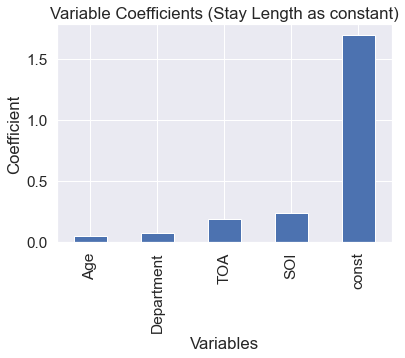

In [517]:
## Analysis and Vizualization of Coefficients

columns_1 = ['TOA', 'Department', 'SOI','Age']
columns_2 = ['Stay']

independent_variables = stats[columns_1]
dependent_variables = stats[columns_2]

independent_variables = sm.add_constant(independent_variables)

regression_model = sm.OLS(dependent_variables,independent_variables).fit()
regression_model.summary()

x_labels = [
    0.05,
    0.06,
    0.18,
    0.23,
    1.67,
]

regression_model.params

coeff = regression_model.conf_int()

coeff_sorted =coeff.sort_values(1, ascending=True)

coeff_sorted[1].plot(kind='bar')

plt.xlabel('Variables')
plt.ylabel('Coefficient')

plt.title('Variable Coefficients (Stay Length as constant)')

In [518]:
### INSIGHTS
⮞ SOI (Severity of Illness) correlates the most with stay with a coefficient of 0.23, followed by TOA (Type of Admission) (0.18), Department (0.06), and Age (0.05).

SyntaxError: invalid character '⮞' (U+2B9E) (1155875954.py, line 2)

In [519]:
## Key Insights and Recommendations:

Insight: Patients who stay for the two most common Stay Lengths of 11-20 and 21-30 Days also have the highest average Admission Deposits
Recommendation: Decrease patient stays of 31+ Days to increase profits

Insight: Regression Analysis revealed that Severity of Illness is the best predictor of how long a patient will need to stay,  but is still considered a low correlation.
Patients identified as Severity of Illness  of Extremely ill at intake were more likely to have a longer stay, and patients identified as Minorly ill at intake were more likely to have a shorter stay.
Recommendation: Although a low correlation, this information can still be used to predict stays for those who are Extremely and Minorly ill. See "Analyst's Next Steps" for further clarification.

Insight:  Type of Admission has the second strongest correlation of 0.18, which is still considered a low correlation.
Patients with the Type of Admission of Urgent were more likely to have stays of 0-20 Days, and patients with Emergency admissions were not likely to have stays 61+ Days. 
Recommendation:  Although a low correlation, this information can still be used to predict stays for those who were Urgent and Emergency Admissions. See "Analyst's Next Steps" for further clarification.


SyntaxError: invalid syntax (2660689186.py, line 3)

In [520]:
## Key Insights and Next Steps:

Insight: Variables Age Groups and Departments have a very low correlation with Stay Length, although some groups and departments seem to correlate more than others
Analyst's Next Step: The Age Groups and Departments that have low variability could be further analyzed to see if correlations can be identified to refine predictions.

Insight: The two highest correlated variables of Severity of Illness and Type of Admission are still considered low correlation.
Analyst's Next Step: Analyze these variables in conjunction with each other and Stay Length to determine if insights can be gleaned from these three variables together, particularly the less variable categories within the variables.

Insight: An abundance of categorical data and lack of numerical data made statistical analysis difficult, and contributed to the lack of success with this project. 
Analyst's Next Step: More numeric OR categorical (nominal or ordinal) data that can be binary or trinary should be sought out to conduct a more thorough and predictive analysis.

SyntaxError: invalid syntax (2450453838.py, line 3)